<a href="https://drive.google.com/file/d/1i5dnag0O5w0PZVIIqG_kKpI5L1PPe42n/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Encoding with Kay and Gallant Dataset


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import normalize, resize, to_tensor
import torchvision.models as models
import skimage.transform
import torchvision.transforms as transforms
from skimage.color import gray2rgb
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def scale_range(input, min, max):
    input += -(np.min(input))
    input /= (1e-9 + np.max(input) / (max - min + 1e-9))
    input += min
    return input

In [ ]:
## Data Preparation
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')

In [ ]:
## Dataset
class KayGallantDataset(Dataset):
  def __init__(self, dat, labels, mode='train'):
    self.dat = dat
    self.labels = labels
    self.mode = mode

  def __len__(self):
    return len(self.labels[0,:])

  def __getitem__(self, idx):
    if self.mode == 'train':
      stimuli = self.dat['stimuli'][idx].astype(np.float32)
      stimuli = gray2rgb(stimuli)
      #stimuli = resize(stimuli,(224,224))
      stimuli = skimage.transform.resize(stimuli,(224,224,3))
      stimuli = to_tensor(stimuli)
      label = self.labels[3,idx]
    #elif self.mode == 'test':
    #  stimuli = self.dat['stimuli_test'][idx]

    return (stimuli,label)

In [ ]:
## Data Loading
kay_dataset = KayGallantDataset(dat,labels)
print(type(kay_dataset))
data_loader = DataLoader(kay_dataset,batch_size=16)

<class '__main__.KayGallantDataset'>
<class 'torch.utils.data.dataloader.DataLoader'>


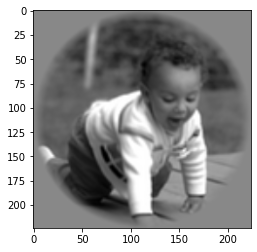

In [ ]:
## Data Visualization
im = kay_dataset[0][0].numpy().transpose(1,2,0)
plt.imshow(scale_range(im,0,1),cmap='gray')
plt.show()

In [ ]:
## Network
#resnet50 = models.resnet50(pretrained=True)
#resnext50 = models.resnext50_32x4d(pretrained=True)
#resnet_wide50 = models.wide_resnet50_2(pretrained=True)
vgg16 = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [ ]:
## Get Features

def get_features(model, test_loader, use_gpu=True):
    with torch.no_grad():
        print("Transforming feautres")
        model.eval()
        model = model.cuda()
        for i, data in enumerate(test_loader):
            img, labels = data
            if use_gpu:
                img = img.cuda()
                #labels = labels.cuda()
            #out = model(img)
            out1 = model.conv1(img)
            interm_input = model.maxpool(model.relu(model.bn1(out1)))
            out2 = model.layer1(interm_input)
            out3 = model.layer2(out2)
            out4 = model.layer3(out3)
            out5 = model.layer4(out4)
            out6 = model.avgpool(out5)

            #print(out6.size())
            #_, predicted = torch.max(pred_labels.data, 1)

    return {out}

In [ ]:
get_features(vgg16,data_loader)

Transforming feautres
torch.Size([16, 64, 112, 112])
torch.Size([16, 256, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 2048, 7, 7])
torch.Size([16, 2048, 1, 1])
torch.Size([16, 64, 112, 112])
torch.Size([16, 256, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 2048, 7, 7])
torch.Size([16, 2048, 1, 1])
torch.Size([16, 64, 112, 112])
torch.Size([16, 256, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 2048, 7, 7])
torch.Size([16, 2048, 1, 1])
torch.Size([16, 64, 112, 112])
torch.Size([16, 256, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 2048, 7, 7])
torch.Size([16, 2048, 1, 1])
torch.Size([16, 64, 112, 112])
torch.Size([16, 256, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 2048, 7, 7])
torch.Size([16, 2048, 1, 1])
torch.Size([16, 64, 112, 112])
torch.Size([16, 256, 56, 56])
torch.Size([16, 5

KeyboardInterrupt: ignored